In [1]:
##################################################
# <실습12>
### 예제8-7 챗봇 엔진 의도(Intent) 분류 모델
### CNN으로 학습
##################################################
import sys
sys.path.append('C:/chatbot')

In [2]:
import tensorflow as tf
from tensorflow.keras import preprocessing
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, Conv1D, GlobalMaxPool1D, concatenate
import pandas as pd

In [3]:
# 데이터 읽어오기
train_file = 'total_train_data.csv'
data = pd.read_csv(train_file, delimiter=',')
queries = data['query'].tolist()
intents = data['intent'].tolist()

In [4]:
queries

['헬로우',
 '헬로',
 '안부 인사드립니다.',
 '먼저 인사하려고 했는데 짝남이 먼저 인사해줬어. 더 떨렸겠어요.',
 '먼저 인사할까 했는데 짝녀가 먼저 인사해줬어. 기분 좋았겠네요.',
 '각자 집에 인사드리러 가 제가 더 떨리네요.',
 '이별의 마무리 가벼운 안부 인사일 거예요.',
 '용기내서 새해인사 했네 이제 연락하지 마세요.',
 '오늘 마지막 인사를 하러가네 미련없길 바랄게요.',
 '오늘 마지막 인사하러 갑니다. 미련없이 정리했긴 바랍니다.',
 '내 마음에 마지막 인사 마음이랑 잘 인사해요.',
 '먼저 잘게 잘자 안녕히 주무세요.',
 '진짜 이제 안녕 맘고생 많았어요.',
 '잘가 안녕.',
 '이제 진짜 안녕!! 안녕!',
 '이젠 진짜 진짜 안녕 맘 고생 많았어요.',
 '안녕을 고하며 잘 보내주었나요.',
 '안녕하세 안녕하세요.',
 '안녕하세요',
 '반가워요',
 '반가반가',
 '방가방가',
 '하이',
 '안녕',
 '좋은 아침이야',
 '진짜 반갑다',
 '요즘 어떻게 지냈어요?',
 '잘 지냈습니까?',
 '잘지내지?',
 '만나서 반가워요',
 '만나서 반갑습니다',
 '하이루',
 '반갑',
 '잘지냈어요?',
 '잘지냈어?',
 '나 먼저 잘게 안녕히 주무세요.',
 '안녕히 주무세요.',
 '안녕 안녕하세요.',
 '안녕안녕 안녕하세요.',
 '안녕하세요 안녕하세요.',
 '안뇽 안녕하세요.',
 '자야겠다. 안녕히 주무세요.',
 '이제 그만 잘래 안녕히 주무세요.',
 '속시원해~~안녕 잘가~~~ 이제 정말 안녕',
 '연락 처음에 어떻게 시작함 안녕 이라고 인사부터 해보세요.',
 '연락 어떻게 시작함 안녕 이라고 인사부터 해보세요.',
 '이제 거리 어디를 나서나 봄기운을 확연히 느낄 수 있는 계절입니다.',
 '밝고 생동감 넘치는 사람들의 표정에서도 어느덧 봄 기운을 느낄 수 있습니다.',
 '창문 틈으로 새어들어오는 따스한 햇볕이 온 몸을 훈훈하게 해 주는 따스한 계절 봄입니다.',
 '따스한 

In [5]:
print(intents)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [6]:
from utils.Preprocess import Preprocess
p = Preprocess(word2index_dic='../../train_tools/dict/chatbot_dict.bin',  # <실습8>에서 만든 딕셔너리
               userdic='../../utils/user_dic.tsv')  # 저자가 만든 파일 복사해 온 것.

# 단어 시퀀스 생성
sequences = []
for sentence in queries:
    pos = p.pos(sentence) # [(단어, 품사), (단어, 품사) ...]
    keywords = p.get_keywords(pos, without_tag=True)  # 불용어 제거 후 단어리스트 ['주요단어', '주요단어',...]
    seq = p.get_wordidx_sequence(keywords)  # 주요단어의 인덱스 리스트 [713, 1106, ...]
    sequences.append(seq)  # 모든 문장을 인덱스 리스트로 만든 리스트

In [7]:
pos

[('ㅋㅋㅋ', 'NA')]

In [8]:
# 문장을 숫제 벡터로

print(sequences)

[[1], [6708], [2967, 1051, 66], [684, 1051, 2, 567, 896, 684, 1051, 8, 149, 1135], [684, 1051, 2, 567, 666, 684, 1051, 8, 732, 162], [2130, 526, 1051, 66, 43, 550, 149, 1135], [522, 1362, 1463, 2967, 1051, 19, 65], [901, 183, 764, 6709, 2, 571, 532, 133], [40, 1, 2, 43, 849, 176, 572], [40, 1, 43, 849, 824, 640, 572], [183, 513, 1, 513, 668, 366, 1051], [684, 366, 366, 3975, 1363, 683], [696, 571, 1580, 773, 1052, 545], [366, 43, 1580], [571, 696, 1580, 1, 1580], [571, 696, 696, 1580, 773, 1052, 545], [1580, 6710, 366, 700, 8], [1580, 353], [353], [1954], [6711, 6711], [1207, 3213], [2328], [1580], [1], [696, 1954], [902, 28, 856], [366, 856], [366, 856], [538, 1954], [538, 4528], [2, 1333], [628, 2214], [366, 856], [366, 856], [35, 684, 366, 3975, 1363, 683], [3975, 1363, 683], [1580, 353], [1580, 1580, 353], [353, 353], [9423, 353], [613, 2, 3975, 1363, 683], [571, 996, 613, 3975, 1363, 683], [731, 1267, 1580, 366, 43, 571, 644, 1580], [532, 802, 28, 631, 1580, 19, 19, 1051, 570], [5

In [9]:
len(sequences)  # 총 문장 수

105658

In [10]:
# 단어 인덱스 시퀀스 벡터 생성
# 단어 인덱스 벡터 크기
from config.GlobalParams import MAX_SEQ_LEN  # 15
padded_seqs = preprocessing.sequence.pad_sequences(sequences, 
                                                   maxlen=MAX_SEQ_LEN, 
                                                   padding='post')
padded_seqs

array([[    1,     0,     0, ...,     0,     0,     0],
       [ 6708,     0,     0, ...,     0,     0,     0],
       [ 2967,  1051,    66, ...,     0,     0,     0],
       ...,
       [11236,     0,     0, ...,     0,     0,     0],
       [11237,     0,     0, ...,     0,     0,     0],
       [11238,     0,     0, ...,     0,     0,     0]])

In [11]:
# 학습용, 검증용, 테스트용 데이터셋 생성
# 학습셋:검증셋:테스트셋 = 7:2:1
ds = tf.data.Dataset.from_tensor_slices((padded_seqs, intents)) # padding된 문장, intent(0,1,...4)
ds = ds.shuffle(len(queries))

train_size = int(len(padded_seqs) * 0.7)  # 73960
val_size = int(len(padded_seqs) * 0.2)    # 21131
test_size = int(len(padded_seqs) * 0.1)   # 10565

train_ds = ds.take(train_size).batch(20)  # 20개 짜리 batch 3698개를 train_size만큼 가져옴 (3698, 20, 15)
val_ds = ds.skip(train_size).take(val_size).batch(20) # 20개 짜리 batch 1057개  (1057, 20, 15)
test_ds = ds.skip(train_size + val_size).take(test_size).batch(20)  # (529, 20, 15)
train_ds, val_ds, test_ds

(<BatchDataset shapes: ((None, 15), (None,)), types: (tf.int32, tf.int32)>,
 <BatchDataset shapes: ((None, 15), (None,)), types: (tf.int32, tf.int32)>,
 <BatchDataset shapes: ((None, 15), (None,)), types: (tf.int32, tf.int32)>)

In [12]:
# 하이퍼파라미터 설정
dropout_prob = 0.5
EMB_SIZE = 128   # 단어 임베딩 벡터의 차원 (크기)
EPOCH = 5        # 학습 수
VOCAB_SIZE = len(p.word_index) + 1  # 전체 단어 수 17751
VOCAB_SIZE

17751

In [13]:
# CNN 모델 정의
input_layer = Input(shape=(MAX_SEQ_LEN,))   # (15,)  문장을 숫자로 15개짜리 VECTOR
embedding_layer = Embedding(VOCAB_SIZE, EMB_SIZE, input_length=MAX_SEQ_LEN)(input_layer)
dropout_emb = Dropout(rate=dropout_prob)(embedding_layer)

conv1 = Conv1D(
    filters=128,
    kernel_size=3,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool1 = GlobalMaxPool1D()(conv1)

conv2 = Conv1D(
    filters=128,
    kernel_size=4,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool2 = GlobalMaxPool1D()(conv2)

conv3 = Conv1D(
    filters=128,
    kernel_size=5,
    padding='valid',
    activation=tf.nn.relu)(dropout_emb)
pool3 = GlobalMaxPool1D()(conv3)

# 3, 4, 5-gram 이후 합치기
concat = concatenate([pool1, pool2, pool3])

hidden = Dense(128, activation=tf.nn.relu)(concat)
dropout_hidden = Dropout(rate=dropout_prob)(hidden)
logits = Dense(5, name='logits')(dropout_hidden)
predictions = Dense(5, activation=tf.nn.softmax)(logits)

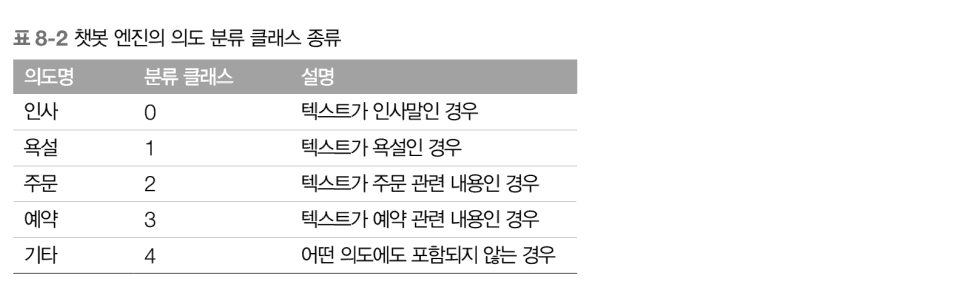

In [21]:
# 모델 생성
model = Model(inputs=input_layer, outputs=predictions)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 15)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 15, 128)      2272128     input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 15, 128)      0           embedding[0][0]                  
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 13, 128)      49280       dropout[0][0]                    
______________________________________________________________________________________________

In [22]:
%%time
# 3698/3698 [==============================] - 77s 21ms/step - loss: 0.0104 - accuracy: 0.9964 - val_loss: 0.0055 - val_accuracy: 0.9976
# CPU times: total: 26min 18s
# Wall time: 6min 29s
# 모델 학습
model.fit(train_ds, validation_data=val_ds, epochs=EPOCH, verbose=1)

Epoch 1/5
3698/3698 [==============================] - 161s 43ms/step - loss: 0.0519 - accuracy: 0.9839 - val_loss: 0.0140 - val_accuracy: 0.9954
Epoch 2/5
3698/3698 [==============================] - 141s 38ms/step - loss: 0.0159 - accuracy: 0.9945 - val_loss: 0.0105 - val_accuracy: 0.9935
Epoch 3/5
3698/3698 [==============================] - 131s 35ms/step - loss: 0.0120 - accuracy: 0.9954 - val_loss: 0.0067 - val_accuracy: 0.9968
Epoch 4/5
3698/3698 [==============================] - 126s 34ms/step - loss: 0.0094 - accuracy: 0.9960 - val_loss: 0.0055 - val_accuracy: 0.9974
Epoch 5/5
3698/3698 [==============================] - 126s 34ms/step - loss: 0.0095 - accuracy: 0.9964 - val_loss: 0.0057 - val_accuracy: 0.9976
CPU times: total: 24min 8s
Wall time: 11min 42s


In [23]:
# 모델 평가(테스트 데이터셋 이용)
loss, accuracy = model.evaluate(test_ds, verbose=1)
print('Accuracy: %f' % (accuracy * 100))
print('loss: %f' % loss)

# 모델 저장
model.save('intent_model.h5')

529/529 [==============================] - 2s 3ms/step - loss: 0.0057 - accuracy: 0.9971
Accuracy: 99.706578
loss: 0.005714
